In [1]:
import NeuralNetwork as nn 
from optimizers import AdamW
import numpy as np 

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv("sentiment_analysis.csv")
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [5]:
x_train = df['text'].to_list()
y_train = [1 if s == 'positive' else 0 for s in df['sentiment']]

In [6]:
class Tokenizer :
    def __init__(self) :
        self.word2text = dict()
        self.counter = 1
    
    def fit_on_text (self,text:list) :
        for t in text :
            if isinstance(t,str) :
                word = t.lower().split()
            else :
                t = str(t)
                word = t.lower().split()
            
            for w in word :
                self.word2text[w] = self.counter
                self.counter +=1 
    
    def text_to_sequence (self,text : list,len_pad = 0 ) :
        array_num = []
        for t in text  :
            if isinstance(t,str) :
                word = t.lower().split()
            else :
                t = str(t)
                word = t.lower().split()
            
            number =[]
            for w in word :
                number.append(self.word2text.get(w))
                
            for _ in range(len(number),len_pad):
                if len_pad > len(word) :
                    number.append(0)
                else :
                    raise RuntimeError("error the len pad must > len text")
            array_num.append(number)
        return np.array(array_num)



In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_text(x_train)

In [8]:
X_train = tokenizer.text_to_sequence(x_train,29)
X_train

array([[5331, 5714, 4072, ...,    0,    0,    0],
       [5729, 5280, 5668, ...,    0,    0,    0],
       [ 773,  663, 5408, ...,    0,    0,    0],
       ...,
       [5702, 5703, 5704, ...,    0,    0,    0],
       [5709, 5710, 5711, ...,    0,    0,    0],
       [5721, 5729, 5723, ...,    0,    0,    0]])

In [9]:
tokenizer.counter

5733

In [24]:
model = nn.Sequential([
    nn.Embedding(5800,32),
    nn.SimpleRNN(64,return_sequence=True),
    nn.GlobalAveragePooling(axis=1),
    nn.Linear(128),
    nn.ReLU(),
    nn.Linear(1),
    nn.Sigmoid()
])

In [41]:
optimizer = AdamW(lr=0.008,clipnorm=1.0)
loss_fn = nn.BinaryCrossEntropy()

In [32]:
import matplotlib.pyplot as plt

In [44]:
y_train = np.array(y_train).reshape(-1,1)

In [43]:
loss_record = list()

In [47]:
epochs = 100
for epoch in range(epochs) :
    y_pred = model(X_train)
    loss = loss_fn(y_train,y_pred)
    loss_record.append(loss)
    grad = loss_fn.backward()
    model.backward(grad)
    optimizer.apply_weight(model.get_weight())
    optimizer.apply_grad(model.get_gradient())
    new_weight = optimizer.step()
    model.update_weight(new_weight)
    print(f"epoch {epoch + 1} {epochs} : loss : {loss:.6f}")
    

epoch 1 100 : loss : 0.636047
epoch 2 100 : loss : 0.636050
epoch 3 100 : loss : 0.636048
epoch 4 100 : loss : 0.636045
epoch 5 100 : loss : 0.636047
epoch 6 100 : loss : 0.636051
epoch 7 100 : loss : 0.636051
epoch 8 100 : loss : 0.636050
epoch 9 100 : loss : 0.636052
epoch 10 100 : loss : 0.636056
epoch 11 100 : loss : 0.636059
epoch 12 100 : loss : 0.636060
epoch 13 100 : loss : 0.636064
epoch 14 100 : loss : 0.636071
epoch 15 100 : loss : 0.636079
epoch 16 100 : loss : 0.636090
epoch 17 100 : loss : 0.636106
epoch 18 100 : loss : 0.636135
epoch 19 100 : loss : 0.636185
epoch 20 100 : loss : 0.636281
epoch 21 100 : loss : 0.636488
epoch 22 100 : loss : 0.636961
epoch 23 100 : loss : 0.637867
epoch 24 100 : loss : 0.638665
epoch 25 100 : loss : 0.638266
epoch 26 100 : loss : 0.638668
epoch 27 100 : loss : 0.638181
epoch 28 100 : loss : 0.636468
epoch 29 100 : loss : 0.636316
epoch 30 100 : loss : 0.637540
epoch 31 100 : loss : 0.637497
epoch 32 100 : loss : 0.636319
epoch 33 100 : lo

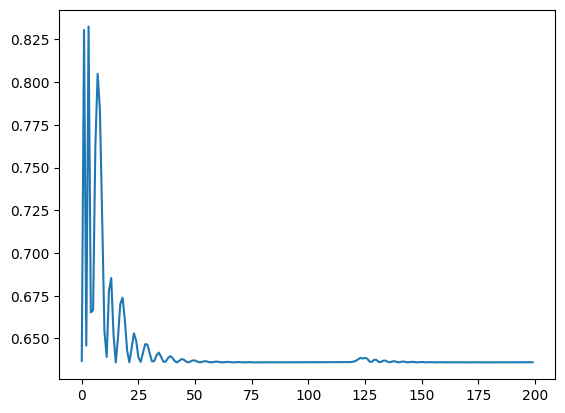

In [48]:
plt.plot(loss_record)
plt.show()